# Variational Circuit

In [1]:
import numpy as np
from qiskit import *
from qiskit.circuit import Qubit
from qiskit.quantum_info import Statevector

from matplotlib import pyplot as plt

In [2]:
n = 3
W = np.random.rand(n,3)/10
W

array([[0.09037691, 0.01263463, 0.09518555],
       [0.03752897, 0.02784399, 0.07373099],
       [0.05683503, 0.06149333, 0.03197067]])

In [5]:
def VQC_qiskit(n, num_layer, bias_init=0.0):
    W = (0.01 * np.random.randn(num_layer, n, 3))

    qr = QuantumRegister(n, 'q')
    cr = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qr, cr)

    for layer in range(num_layer):
        for qubit in range(n):
            qc.u3(W[layer, qubit, 0], W[layer, qubit, 1], W[layer, qubit, 2], qubit)
        for qubit in range(n):
            if qubit == n-1 and n != 2:
                qc.cx(qubit, 0)
            elif qubit == n-1 and n == 2:
                pass
            else:
                qc.cx(qubit, qubit+1)

    return qc

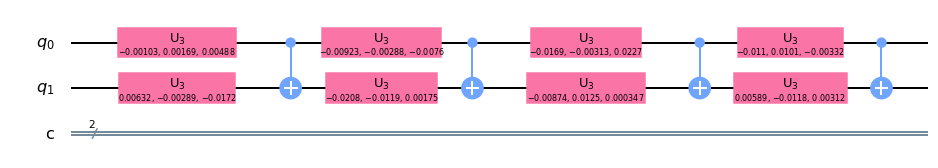

In [6]:
VQC_qiskit(2, 4).draw('mpl')